In [1]:
import pandas as pd
DF=pd.read_csv('nlpdata.csv')


In [2]:
DF.isna().sum()

Content    8
Topic      0
dtype: int64

In [3]:
#delete nan values
DF.dropna(inplace=True) 

In [4]:
DF.isna().sum()

Content    0
Topic      0
dtype: int64

In [5]:
#import seaborn as sns
#sns.countplot(x= 'Topic',data = DF)

In [6]:
import re, nltk
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

from nltk.tokenize import regexp_tokenize 

def normalizer(sen):
    sen = re.sub(r'[^\u0600-\u06ff\u0750-\u077f\ufb50-\ufbc1\ufbd3-\ufd3f\ufd50-\ufd8f\ufd50-\ufd8f\ufe70-\ufefc\uFDF0-\uFDFD ]+', '', sen)# keep only arabic letters and spaces 
    sen=re.sub(r'\b\w{1,3}\b', ' ', sen).strip() #delete words that less than 4 letter
    tokens=regexp_tokenize(sen, "[\w']+") #tekonize words 
    return tokens

In [7]:
#example of normalizer application on our Data
DF['normalized'] = DF.Content.apply(normalizer)
DF['normalized'][1]

['يتفرع',
 'الإنسان',
 'الإنسان',
 'الاجتماعي',
 'الذي',
 'يدرس',
 'تصرفات',
 'البشر',
 'المعاصرين',
 'وعلم',
 'الإنسان',
 'الثقافي',
 'الذي',
 'يدرس',
 'بناء',
 'الثقافات',
 'البشرية',
 'وأداءها',
 'وظائفها',
 'زمان',
 'ومكان',
 'وعلم',
 'الأنثروبولوجيا',
 'اللغوية',
 'الذي',
 'يدرس',
 'تأثير',
 'اللغة',
 'الحياة',
 'الاجتماعية',
 'وعلم',
 'الإنسان',
 'الحيوي',
 'الذي',
 'يدرس',
 'تطور',
 'الإنسان',
 'بيولوجي',
 'الآثار',
 'الذي',
 'يدرس',
 'ثقافات',
 'البشر',
 'القديمة',
 'بالتحقيق',
 'الأدلة',
 'المادية',
 'فيعد',
 'الإنسان',
 'الولايات',
 'المتحدة',
 'بينما',
 'إليه',
 'أوروبا',
 'منفصل',
 'بذاته',
 'أقرب',
 'التاريخ',
 'الأنثروبولوجيا']

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
#from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
# create a pipeline that will automate modeling workflow: apply normalizer function+create Bag of Words(BoW)+use algorithm of Naive Bayes:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=normalizer)),  # normalized strings to token integer counts
    ('classifier', MultinomialNB()) # train on vectors w/ Naive Bayes classifier
])

In [9]:
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(DF['Content'],DF['Topic'], test_size=0.33, random_state=42)

In [10]:
pipeline.fit(X_train,y_train)


Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function normalizer at 0x000002043564A4C8>)),
                ('classifier', MultinomialNB())])

In [11]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.metrics import f1_score
y_pred= pipeline.predict(X_test)
#let's see our classification report
print(classification_report(y_test, y_pred, target_names=list(DF.Topic.unique())))


              precision    recall  f1-score   support

Anthropology       1.00      1.00      1.00        17
   Astronomy       1.00      1.00      1.00        35

    accuracy                           1.00        52
   macro avg       1.00      1.00      1.00        52
weighted avg       1.00      1.00      1.00        52



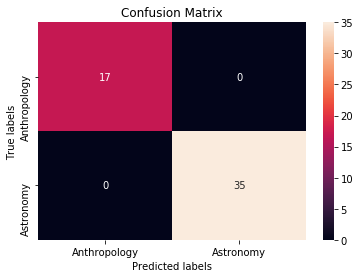

In [12]:
#let's see our confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt     
cm=confusion_matrix(y_test, y_pred, labels=['Anthropology','Astronomy'])
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Anthropology','Astronomy']); ax.yaxis.set_ticklabels(['Anthropology','Astronomy']);


In [13]:
#let's test our algorithm:
mytext='إن تباين مفهوم (علم الكون) وفقًا لحجم كتابة أول حرف من تهجئته، يوحي بأن هناك أكثر من كون تم إيجاده في هذه الحياة، وهو أمر مستحيل بالطبيعة، فلا يوجد في هذه الحياة سوى كون واحد، وذلك يضعنا في مشكلة كيفية إمكان تطبيق تجارب مختلفة لأكثر من مفهوم على كون واحد'
myprediction= pipeline.predict([mytext])
print(myprediction[0])


Astronomy


In [14]:
import pickle
pickle.dump(pipeline,open('model.pkl',"wb"))